# Intro to R

As a demo of the language, plot sin and cos on the same axis:

In [46]:
# set up the default plot height and width (this is just for aesthetics)
library('repr')
options(repr.plot.width=6, repr.plot.height=5)

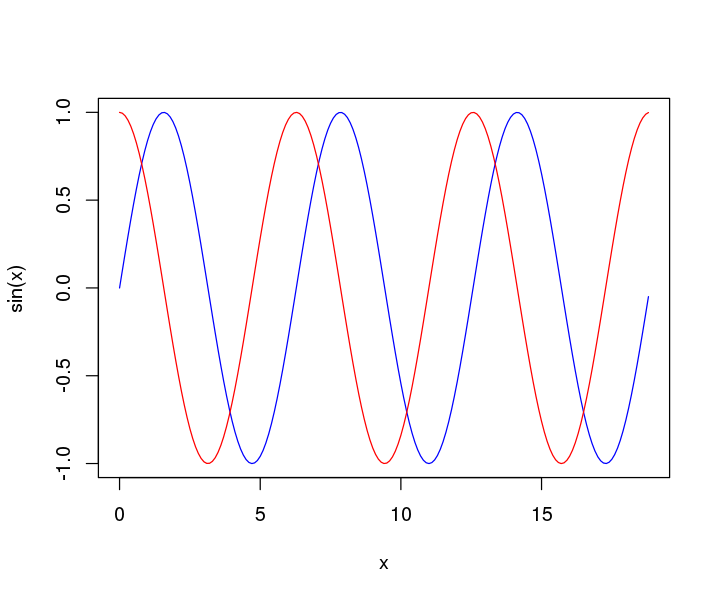

In [47]:
# define a sequence of points (start, end, by)
x = seq(0, 6*pi, 0.1)

# plot the sin of these points
plot(x, sin(x), type="l", col="blue")

# add a cos line to the plot
lines(x, cos(x), col="red")

# Netcdf

The easiest way to load and analyze NetCDF data in R involves the [ncdf4 package](https://cran.r-project.org/web/packages/ncdf4/ncdf4.pdf "ncdf4 Docs"). 

In [48]:
library('ncdf4')

data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc'
variable = 'AirTC_Avg'

ds = nc_open(data_url)

In [49]:
AirT.data = ncvar_get(ds, variable)
AirT.units = ncatt_get(ds, variable, 'units')$value

In [103]:
time.data = ncvar_get(ds, 'time')
time.units = ncatt_get(ds, 'time', 'units')$value
print(time.units)

[1] "seconds since 1970-01-01"


In [104]:
# convert the time to a date string
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

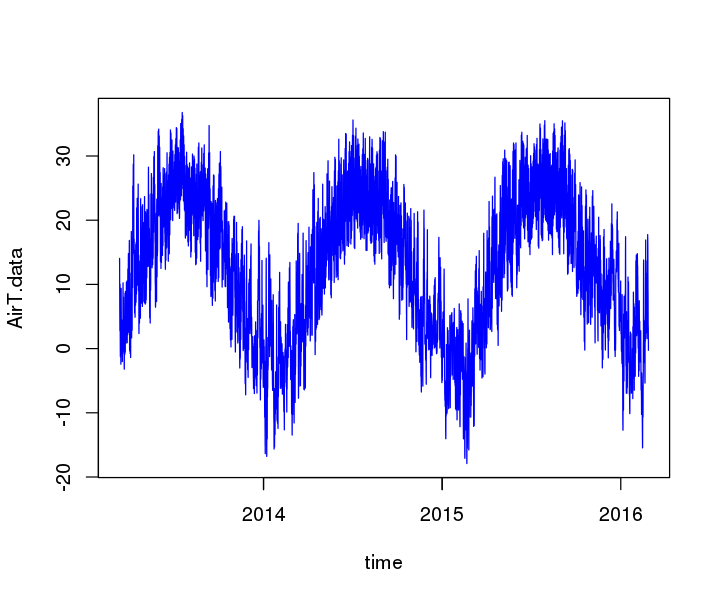

In [52]:
plot(time, AirT.data, type="l", col="blue")

## Time slices

In [53]:
options(repr.plot.width=8, repr.plot.height=4)

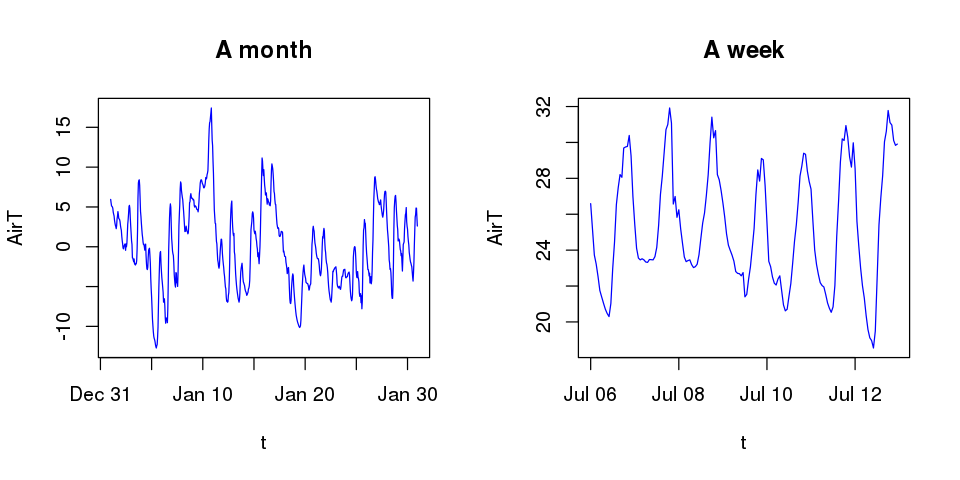

In [54]:
# find numerical indexers using timestamps
start = which(time=="2016-01-01")
count = which(time=="2016-01-31") - start

# select a slice using numerical indexers
AirT = ncvar_get(ds,variable, start, count)
t = time[start:(start+count-1)]

# define a dataframe with time as the names of the rows and air temp as the data
a_month = data.frame(t, AirT)

# do the same for a week
start = which(time=="2015-07-06 00:00:00")
count = which(time=="2015-07-13 00:00:00") - start
AirT = ncvar_get(ds,variable, start, count)
t = time[start:(start+count-1)]
a_week = data.frame(t, AirT)

# plot
layout(matrix(1:2, ncol = 2))
with(a_month, plot(AirT~t, type="l", col="blue", main='A month'))
with(a_week, plot(AirT~t, type="l", col="blue", main='A week'))

## Multiple variables

In [55]:
options(repr.plot.width=8, repr.plot.height=5)

In [56]:
start = which(time=="2015-07-06")
count = which(time=="2015-07-13") - start

Rain = ncvar_get(ds,'Rain_mm_3_Tot', start, count)
VW = ncvar_get(ds,'VW', start, count)
t = time[start:(start+count-1)]

vars_for_a_week = data.frame(t, Rain, VW)

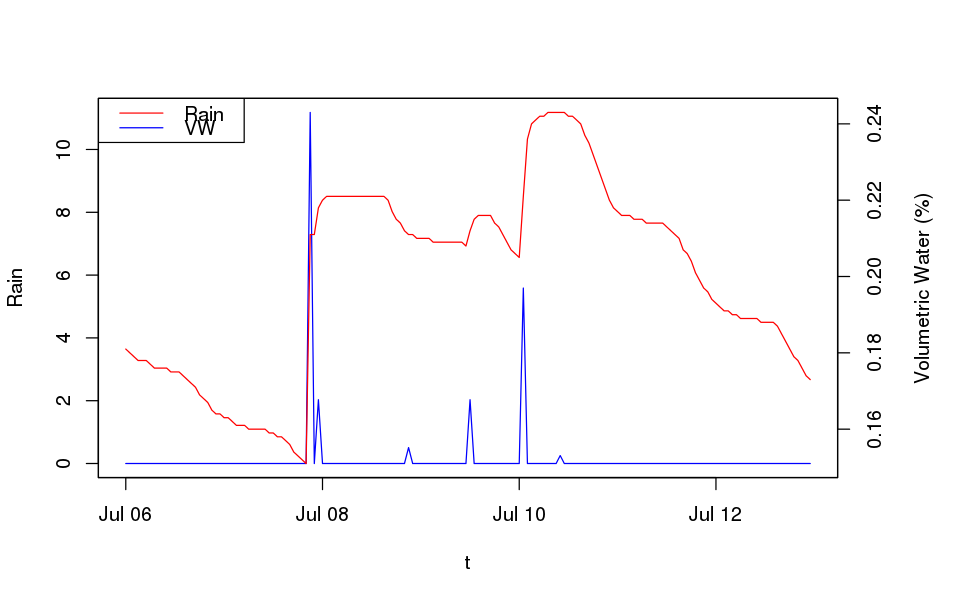

In [57]:
par(mar=c(5,4,4,5)+.1)
with(vars_for_a_week, plot(Rain~t,type="l",col="blue"))
par(new=TRUE)

with(vars_for_a_week, plot(VW~t,type="l",col="red",xaxt="n",yaxt="n",xlab="",ylab=""))
axis(4)
mtext("Volumetric Water (%)",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Rain","VW"))

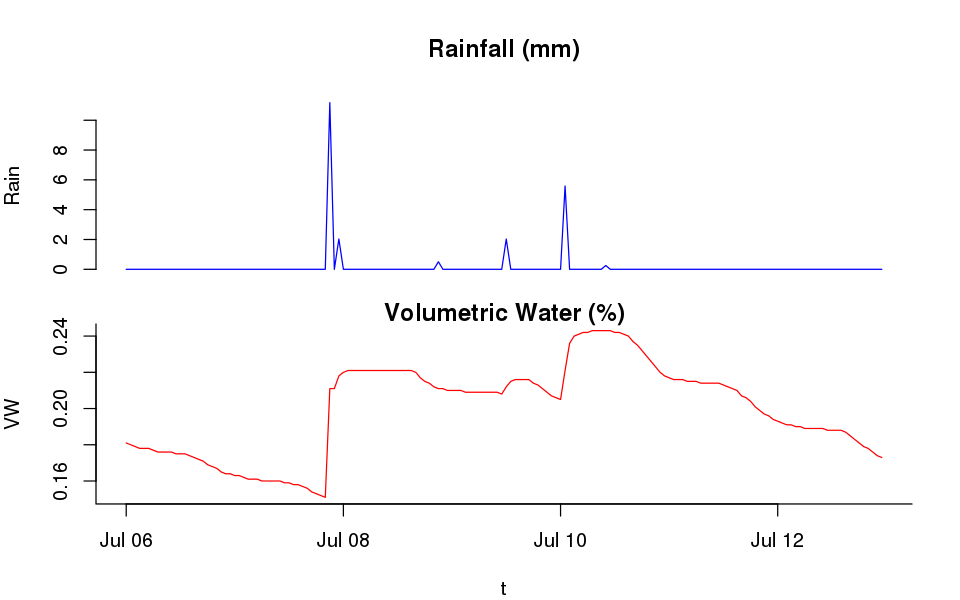

In [58]:
# 2 figures arranged in 2 rows and 1 column
layout(matrix(1:2, ncol = 1))

# set margins (bottom, left, top, right)
par(mar = c(1, 4, 4, 2))
with(vars_for_a_week, plot(Rain~t, type = 'l', col='blue', xaxt = 'n', bty="n", main = 'Rainfall (mm)'))

# set margins (bottom, left, top, right)
par(mar = c(4, 4, 1, 2))
with(vars_for_a_week, plot(VW~t, type = 'l', col='red', bty = "l", main = 'Volumetric Water (%)'))

## Finding rainy days

In [139]:
Rain = ncvar_get(ds, 'Rain_mm_3_Tot')

In [140]:
# use the library xts to facilitate date handling
library(xts)

# create a dataframe object
df = data.frame(row.names=time,Rain)

# create a xts matrix, slice it, and plot it
ts <- as.xts(df, dateFormat = "POSIXct")

# resample to daily taking the sum
daily.rain = apply.daily(ts, sum)

# convert to a dataframe and add a time column
df <- data.frame(daily.rain)
df$time = row.names(df)

# sort by rain in reverse order (highest first)
sorted = df[with(df, order(-Rain)), ]

# print the top of the data.frame to check it out
head(sorted)

,Rain,time
2014-04-30 23:00:00,70.614,2014-04-30 23:00:00
2013-11-27 23:00:00,70.36,2013-11-27 23:00:00
2013-06-07 23:00:00,64.008,2013-06-07 23:00:00
2014-07-15 23:00:00,63.498,2014-07-15 23:00:00
2014-05-01 23:00:00,57.146,2014-05-01 23:00:00
2015-01-18 23:00:00,53.09,2015-01-18 23:00:00


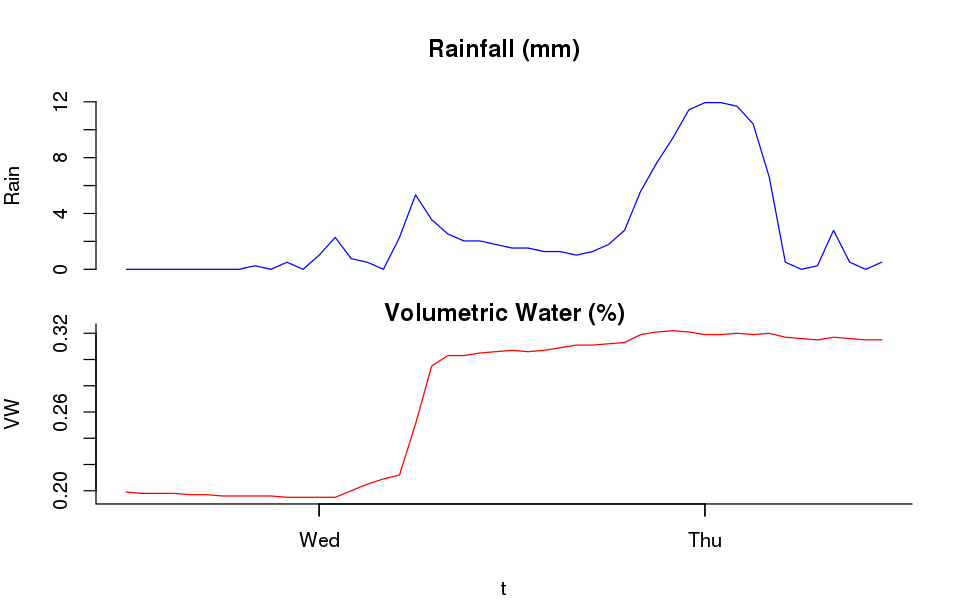

In [143]:
start = which(time=="2014-04-29 12:00")
count = which(time=="2014-05-01 12:00") - start

Rain = ncvar_get(ds,'Rain_mm_3_Tot', start, count)
VW = ncvar_get(ds,'VW', start, count)
t = time[start:(start+count-1)]

rainy_day = data.frame(t, Rain, VW)

layout(matrix(1:2, ncol = 1))

par(mar = c(1, 4, 4, 2))
with(rainy_day, plot(Rain~t, type = 'l', col='blue', xaxt = 'n', bty="n", main = 'Rainfall (mm)'))

par(mar = c(4, 4, 1, 2))
with(rainy_day, plot(VW~t, type = 'l', col='red', bty = "l", main = 'Volumetric Water (%)'))

## Rain on wet soil

## Monthly rainfall

## Multiple sites

In [169]:
options(repr.plot.width=8, repr.plot.height=7)

In [147]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/broadmead.nc'

ds = nc_open(data_url)
time.data = ncvar_get(ds, 'time')
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

start = which(time=="2016-02-23 12:00")
count = which(time=="2016-02-26 12:00") - start

Rain1 = ncvar_get(ds,'Rain_1_mm_Tot', start, count)
Rain2 = ncvar_get(ds,'Rain_2_mm_Tot', start, count)
t = time[start:(start+count-1)]
broadmead_rain = data.frame(t, Rain1, Rain2)

nc_close(ds)

In [177]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_up.nc'

ds = nc_open(data_url)
time.data = ncvar_get(ds, 'time')
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

start = which(time=="2016-02-23 12:00")
count = which(time=="2016-02-26 12:00") - start

level = ncvar_get(ds,'Corrected_cm_Avg', start, count)
t = time[start:(start+count-1)]
washington_up_level = data.frame(t, level)

nc_close(ds)

In [178]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_down.nc'

ds = nc_open(data_url)
time.data = ncvar_get(ds, 'time')
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

start = which(time=="2016-02-23 12:00")
count = which(time=="2016-02-26 12:00") - start

level = ncvar_get(ds,'Corrected_cm_Avg', start, count)
t = time[start:(start+count-1)]
washington_down_level = data.frame(t, level)

nc_close(ds)

In [176]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_lake.nc'

ds = nc_open(data_url)
time.data = ncvar_get(ds, 'time')
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

start = which(time=="2016-02-23 12:00")
count = which(time=="2016-02-26 12:00") - start

level = ncvar_get(ds,'Lvl_cm_Avg', start, count)
t = time[start:(start+count-1)]
washington_lake_level = data.frame(t, level)

nc_close(ds)

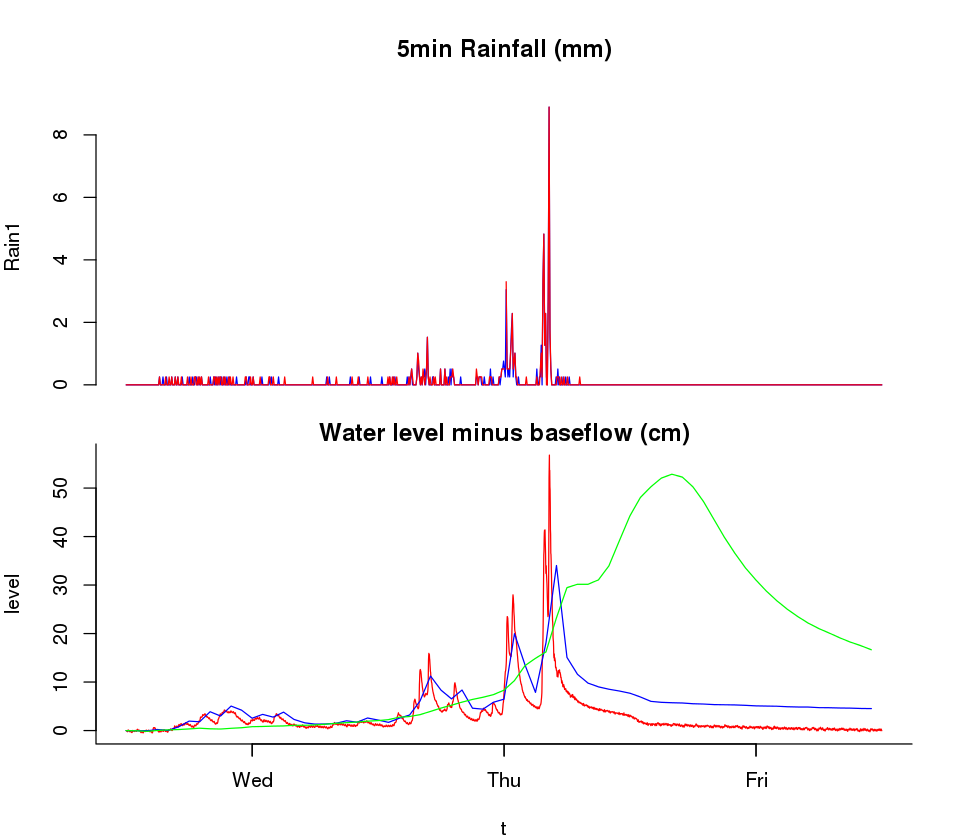

In [179]:
layout(matrix(1:2, ncol = 1))

par(mar = c(1, 4, 4, 2))
with(broadmead_rain, plot(Rain1~t, type = 'l', col='blue', xaxt = 'n', bty="n",main = '5min Rainfall (mm)'))
with(broadmead_rain, lines(Rain2~t, col="red"))

par(mar = c(4, 4, 1, 2))
with((washington_up_level - washington_up_level[1,2]), plot(level~t, type = 'l', col="red", bty = "l", main = 'Water level minus baseflow (cm)'))
with((washington_down_level - washington_down_level[1,2]),lines(level~t, col="blue"))
with((washington_lake_level - washington_lake_level[1,2]),lines(level~t, col="green"))

## Using functions

You might have noticed that the way we pulled data from a multiple datasets was redundant. To simplify this process, we can write a quick function that can be used to pull from any site, any variable and setting your own start and end times. To show how this works, we will do the same exercise that we just did above, but in many fewer lines:

In [218]:
select <- function(site, variable, start.time, end.time){
    data_url = paste0('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/',site,'.nc')

    ds = nc_open(data_url)
    time.data = ncvar_get(ds, 'time')
    time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

    start = which(time==start.time)
    count = which(time==end.time) - start
    var = ncvar_get(ds, variable, start, count)
    t = time[start:(start+count-1)]
    df = data.frame(t, var)
    colnames(df) <- c('t',variable)

    nc_close(ds)
    return(df)
    }

In [224]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          2.2                         
year           2015                        
month          08                          
day            14                          
svn rev        69053                       
language       R                           
version.string R version 3.2.2 (2015-08-14)
nickname       Fire Safety                 

In [220]:
broadmead_rain1 = select('broadmead', 'Rain_1_mm_Tot', "2016-02-23 12:00", "2016-02-26 12:00")
broadmead_rain2 = select('broadmead', 'Rain_2_mm_Tot', "2016-02-23 12:00", "2016-02-26 12:00")
washington_up_level = select('washington_up', 'Corrected_cm_Avg', "2016-02-23 12:00", "2016-02-26 12:00")
washington_down_level = select('washington_down', 'Corrected_cm_Avg', "2016-02-23 12:00", "2016-02-26 12:00")
washington_lake_level = select('washington_lake', 'Lvl_cm_Avg', "2016-02-23 12:00", "2016-02-26 12:00")

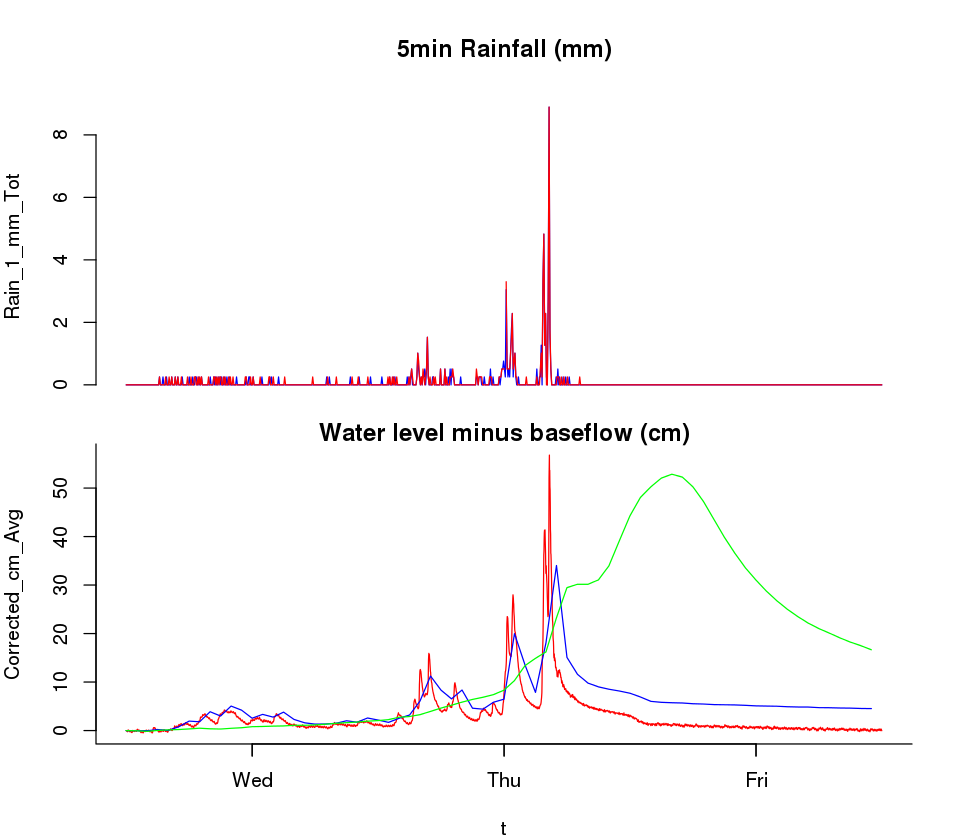

In [222]:
layout(matrix(1:2, ncol = 1))

par(mar = c(1, 4, 4, 2))
with(broadmead_rain1, plot(Rain_1_mm_Tot~t, type = 'l', col='blue', xaxt = 'n', bty="n",main = '5min Rainfall (mm)'))
with(broadmead_rain2, lines(Rain_2_mm_Tot~t, col="red"))

par(mar = c(4, 4, 1, 2))
with((washington_up_level - washington_up_level[1,2]), plot(Corrected_cm_Avg~t, type = 'l', col="red", bty = "l", main = 'Water level minus baseflow (cm)'))
with((washington_down_level - washington_down_level[1,2]),lines(Corrected_cm_Avg~t, col="blue"))
with((washington_lake_level - washington_lake_level[1,2]),lines(Lvl_cm_Avg~t, col="green"))